In [1]:
from skimage.io import imshow, imshow_collection
import numpy as np
import matplotlib.pylab as plt
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening
from skimage import data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def binary_struct_next_rad(cur_struct, single_rad_struct):
    h_expansion = int(single_rad_struct.shape[0] / 2)
    w_expansion = int(single_rad_struct.shape[1] / 2)
    new_height = cur_struct.shape[0] + 2 * h_expansion
    new_width = cur_struct.shape[1] + 2 * w_expansion
    new_struct = np.zeros((new_height, new_width)) == 1
    new_struct[h_expansion:new_height - h_expansion, \
               w_expansion:new_width - w_expansion] = cur_struct.copy()
    return binary_dilation(new_struct, single_rad_struct)

In [29]:
def binary_positive_spectre(image, structure):
    cur_struct = np.zeros((1,1)) == 0
    next_struct = structure.copy()
    cur_opening = binary_opening(image, cur_struct)
    next_opening = binary_opening(image, next_struct)
    pos_spectre = []
    while binary_erosion(image, cur_struct).any():
        temp = np.logical_and(cur_opening, np.logical_not(next_opening))
        pos_spectre.append(np.sum(temp))
        cur_struct = next_struct.copy()
        next_struct = binary_struct_next_rad(cur_struct, structure)
        cur_opening = next_opening.copy()
        next_opening = binary_opening(image, next_struct)
    return pos_spectre


def binary_negative_spectre(image, structure):
    cur_struct = np.zeros((1,1)) == 0
    cur_closing = binary_closing(image, cur_struct)
    next_struct = structure.copy()
    next_closing = binary_closing(image, next_struct)
    temp = np.logical_and(next_closing, cur_closing == 0)
    neg_spectre = []
    while temp.any():
        neg_spectre.append(np.sum(temp))
        cur_struct = next_struct.copy()
        next_struct = binary_struct_next_rad(cur_struct, structure)
        cur_closing = next_closing.copy()
        next_closing = binary_closing(image, next_struct)
        temp = np.logical_and(next_closing, cur_closing == 0)
    return list(reversed(neg_spectre))


def binary_spectre(image, structure):
    neg_sp = binary_negative_spectre(image, structure)
    pos_sp = binary_positive_spectre(image, structure)
    return np.arange(-len(neg_sp), len(pos_sp), 1), np.array(neg_sp + pos_sp)

In [24]:
structure = np.zeros((3,3)) == 1
structure[1, :] = 1
structure[:, 1] = 1
image = data.horse()
test = image[::2, ::2]
range_,  sp_ = binary_spectre(test, structure)

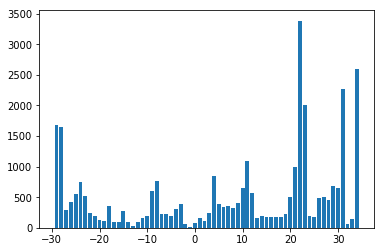

In [25]:
plt.bar(range_, sp_)
plt.show()

In [30]:
from skimage.morphology import dilation, erosion, closing, opening

In [31]:
def struct_next_rad(cur_struct, single_rad_struct):
    h_expansion = int(single_rad_struct.shape[0] / 2)
    w_expansion = int(single_rad_struct.shape[1] / 2)
    new_height = cur_struct.shape[0] + 2 * h_expansion
    new_width = cur_struct.shape[1] + 2 * w_expansion
    new_struct = np.zeros((new_height, new_width))
    new_struct[h_expansion:new_height - h_expansion, \
               w_expansion:new_width - w_expansion] = cur_struct.copy()
    return dilation(new_struct, single_rad_struct)

In [38]:
def positive_spectre(image, structure):
    cur_struct = np.zeros((1,1)) == 0
    next_struct = structure.copy()
    cur_opening = opening(image, cur_struct)
    next_opening = opening(image, next_struct)
    temp = cur_opening - next_opening
    pos_spectre = []
    while temp.any():
        pos_spectre.append(np.sum(temp))
        cur_struct = next_struct.copy()
        next_struct = struct_next_rad(cur_struct, structure)
        cur_opening = next_opening.copy()
        next_opening = opening(image, next_struct)
        temp = cur_opening - next_opening
    return pos_spectre


def negative_spectre(image, structure):
    cur_struct = np.zeros((1,1)) == 0
    cur_closing = closing(image, cur_struct)
    next_struct = structure.copy()
    next_closing = closing(image, next_struct)
    temp = next_closing - cur_closing
    neg_spectre = []
    while temp.any():
        neg_spectre.append(np.sum(temp))
        cur_struct = next_struct.copy()
        next_struct = struct_next_rad(cur_struct, structure)
        cur_closing = next_closing.copy()
        next_closing = closing(image, next_struct)
        temp = next_closing - cur_closing
    return list(reversed(neg_spectre))


def spectre(image, structure):
    neg_sp = negative_spectre(image, structure)
    pos_sp = positive_spectre(image, structure)
    return np.arange(-len(neg_sp), len(pos_sp), 1), np.array(neg_sp + pos_sp)

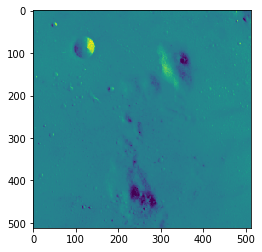

In [43]:
img = data.moon()
imshow(img)

In [47]:
struct = np.zeros((3,3)) == 1
struct[1, :] = 1
struct[:, 1] = 1
test_image = img[::4, ::4]
rng_,  spec_ = spectre(test_image, struct)

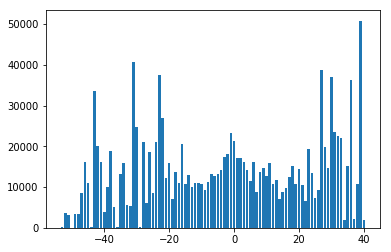

In [48]:
plt.bar(rng_, spec_)
plt.show()